In [1]:
import numpy as np, matplotlib.pyplot as plt

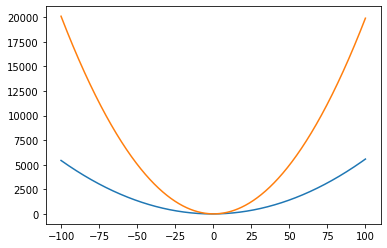

In [2]:
def fun(x):
    return 2*x*x -x + 4

def par(a,b,c,x):
    return a*x*x + b*x + c
size = 1001
ran = 100
x = np.linspace(-ran,ran,size)
y  = fun(x)
np.random.seed(3) # random seed = 29

# a,b,c = np.random.random(3)
a,b,c = np.random.random(3)

y2 = par(a,b,c,x)
plt.plot(x,y2)
plt.plot(x,y)


In [3]:
a,b,c

(0.5507979025745755, 0.7081478226181048, 0.2909047389129443)

In [4]:
def loss(a,b,c,fun,x):
    return abs(par(a,b,c,x) - fun(x))

def totloss(x):
    return (np.mean([loss(a,b,c,fun,xx) for xx in x]))

err = totloss(x)
err

4844.044100662005

In [5]:
# Curve fitting: change a,b,c to minimize error
# Gradient descent: change a,b,c to minimize error

# Gradient descent

def dlossa(a,b,c,fun,x):
    s = [(par(a,b,c,xx) - fun(xx))*xx*xx for xx in x ]
    return 2*np.mean(s)

def dlossb(a,b,c,fun,x):
    s = [(par(a,b,c,xx) - fun(xx))*xx for xx in x ]
    return 2*np.mean(s)

def dlossc(a,b,c,fun,x):
    s = [(par(a,b,c,xx) - fun(xx)) for xx in x ]
    return 2*np.mean(s)

da,db,dc = dlossa(a,b,c,fun,x),dlossb(a,b,c,fun,x),dlossc(a,b,c,fun,x)
da,db,dc

(-58224887.41592462, 11410.427455088833, -9688.08820132401)

lr = 7.68061810422247e-09
Epoch 1/1000, Loss = 3350.3856136897007


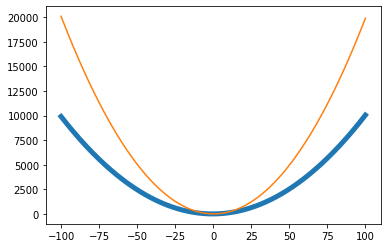

Epoch 201/1000, Loss = 84.65620215643891


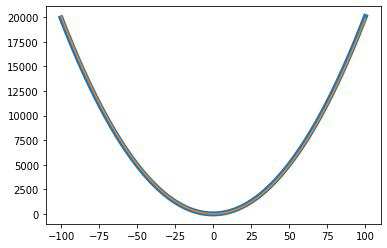

Epoch 401/1000, Loss = 83.79278171351778


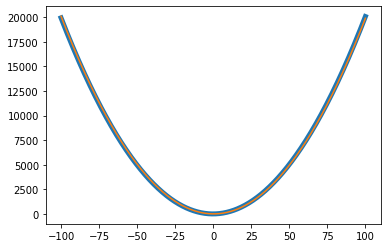

Epoch 601/1000, Loss = 82.93820257684212


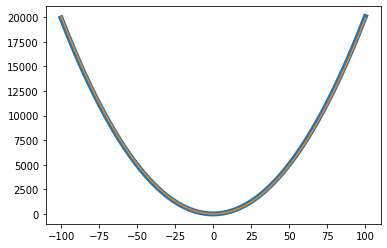

Epoch 801/1000, Loss = 82.09234792178523


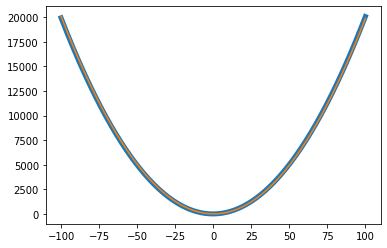

Final Loss = 81.25929344108496
a = 2.00061691752955, b = 0.6227168195303019, c = 0.29109682977820966


In [6]:
import math
num_epochs = 1000

lr = (10**-(math.log10(max(da,db,dc))+2*math.log(max(da,db,dc),100)))
print(f'lr = {lr}')
import time
for epoch in range(num_epochs):
    a -= lr*dlossa(a,b,c,fun,x)
    b -= lr*dlossb(a,b,c,fun,x)
    c -= lr*dlossc(a,b,c,fun,x)
    err = totloss(x)
    if epoch%(num_epochs//5) == 0 :
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {err}")
        # plot the graph, pause for 0.1 sec
        y2 = par(a,b,c,x)
        y = fun(x)
        plt.clf() # clear the previous plot
        # plt.plot(x,y2,)
        # thickness
        plt.plot(x,y2,linewidth=5)
        plt.plot(x,y)
        plt.show()
        time.sleep(0.1)
        

print(f"Final Loss = {err}")
print(f"a = {a}, b = {b}, c = {c}")


2.00061691752955 0.6227168195303019 0.29109682977820966


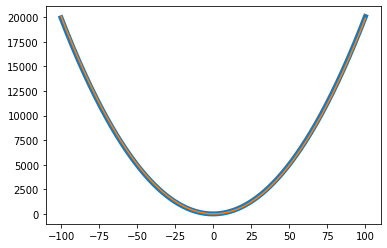

In [7]:
print(a,b,c)
plt.plot(x,par(a,b,c,x),linewidth=5)
plt.plot(x,y)

Assignment :  
Now do for another equation of Hignher Degree.
Do try for np.sin(x) also :)